## Problem 1

#### 1)

In [1]:
import numpy as np

In [2]:
mu = np.array([.08,.14,.16])
std = np.array([.10,.30,.35])
cor = .2
r0 = .05

cov = np.empty((3,3))
for i in range(3):
    for j in range(3):
        if j==i:
            cov[i,j] = std[i]**2
        else:
            cov[i,j] = cor * std[i] * std[j]

cov_inv = np.linalg.inv(cov)

In [3]:
w_tan = np.matmul(cov_inv, mu-r0)/(np.matmul(cov_inv.sum(0), mu) - cov_inv.sum()*r0)

In [4]:
mean = w_tan.dot(mu)
stdv = np.sqrt(np.matmul(w_tan,cov).dot(w_tan))
print('Tangency portfolio summary:\n')
print('Mean: {:0.2f}%'.format((mean)*100))
print('Std: {:0.2f}%'.format(stdv*100))
print('Sharpe ratio: {:0.2f}'.format((mean-r0)/stdv))

Tangency portfolio summary:

Mean: 10.73%
Std: 12.83%
Sharpe ratio: 0.45


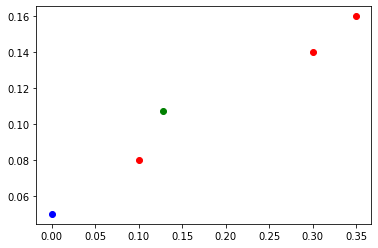

In [5]:
import matplotlib.pyplot as plt

plt.plot(std,mu,'or')
plt.plot(stdv,mean,'og')
plt.plot(0,r0,'ob')

#### 2)

In [14]:
# fix mu_z at r0
mu_z = r0
A = cov_inv.sum()
B = cov_inv.sum(0).dot(mu)
C = mu.transpose().dot(cov_inv).dot(mu)
D = A*C - B**2

In [15]:
# find weights that minimize sigma_z for given mu_z
lam = (C - mu_z*B)/D
gam = (mu_z*A - B)/D

w_z = la